In [94]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [95]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [96]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,19,19,True,25.295727,15.508940,15.508940,32.449837


In [97]:
df.shape

(19002, 27)

In [98]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Age_of_House', 'Years_last_renovation',
       'basement', 'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [99]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

In [100]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
       'distance_from_airport']

In [101]:
df[numericals].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19002 entries, 1 to 21596
Data columns (total 11 columns):
price                    19002 non-null float64
bedrooms                 19002 non-null int64
bathrooms                19002 non-null float64
sqft_living              19002 non-null int64
sqft_lot                 19002 non-null int64
sqft_living15            19002 non-null int64
sqft_lot15               19002 non-null int64
Age_of_House             19002 non-null int64
Years_last_renovation    19002 non-null int64
distance_from_a_city     19002 non-null float64
distance_from_airport    19002 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.7 MB


In [102]:
totransform = ['bathrooms','bedrooms','distance_from_a_city','sqft_lot']

In [103]:
nottransform = ['Age_of_House','distance_from_airport','Years_last_renovation']

In [104]:
data_log = pd.DataFrame([])

for name in totransform:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

,bathrooms_log,bedrooms_log,distance_from_a_city_log,sqft_lot_log
1,0.362692,-0.269661,0.016928,-0.107010
2,-1.733696,-1.717736,0.206141,0.251097
3,1.106397,0.757765,-0.232398,-0.518132
4,0.058204,-0.269661,-0.093899,0.014503
5,2.154591,0.757765,0.315932,2.827636
...,...,...,...,...
21591,0.635066,-0.269661,-0.942240,-2.018199
21592,0.635066,-0.269661,-0.293768,-2.167613
21593,0.635066,0.757765,-0.181243,-0.350937
21594,-2.477401,-1.717736,-2.012248,-1.971183


In [365]:
floor_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
water_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
base_dummies = pd.get_dummies(df['basement'], prefix='base', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [366]:
dfnew = pd.concat([data_log_norm,floor_dummies,view_dummies,cond_dummies,grade_dummies,water_dummies,base_dummies,zipcode_dummies],axis = 1)

In [367]:
datanottransform = df[nottransform].apply(normalize)

In [368]:
dfnew = pd.concat([dfnew,datanottransform],axis = 1)

In [369]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation
0,-1.727276,-0.267365,-0.325988,-0.356548,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.535396,-1.389968,0.608127
1,0.375566,-0.267365,-0.281628,-0.041963,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.671615,0.993080,-0.634569
2,-1.727276,-1.717368,0.111767,0.366964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.284598,1.230350,1.367553
3,1.121561,0.761429,-0.543921,-0.511428,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.194850,-1.099655,0.262934
4,0.070140,-0.267365,0.548454,0.096794,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.554351,0.610933,-0.496491


In [370]:
dfnew['price'] = df.price

In [371]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation,price
0,-1.727276,-0.267365,-0.325988,-0.356548,0,0,0,0,0,0,...,0,0,1,0,0,0,0.535396,-1.389968,0.608127,221900.0
1,0.375566,-0.267365,-0.281628,-0.041963,0,1,0,0,0,0,...,0,0,0,0,0,0,0.671615,0.993080,-0.634569,538000.0
2,-1.727276,-1.717368,0.111767,0.366964,0,0,0,0,0,0,...,0,0,0,0,0,0,1.284598,1.230350,1.367553,180000.0
3,1.121561,0.761429,-0.543921,-0.511428,0,0,0,0,0,0,...,0,0,0,0,0,0,0.194850,-1.099655,0.262934,604000.0
4,0.070140,-0.267365,0.548454,0.096794,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.554351,0.610933,-0.496491,510000.0


In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [135]:
modeldata = ['distance_from_a_city','Age_of_House','Years_last_renovation']

In [124]:
df1 = df[modeldata]

In [125]:
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [126]:
df1= pd.concat([df1,zipcode_dummies],axis = 1)

In [81]:
data_log = pd.DataFrame([])

for name in modeldata:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

,distance_from_a_city_log,Age_of_House_log,bedrooms_log
1,0.016928,0.769485,-0.269661
2,0.206141,1.080199,-1.717736
3,-0.232398,0.465511,0.757765
4,-0.093899,-0.219216,-0.269661
5,0.315932,-0.959226,0.757765
...,...,...,...
21591,-0.942240,-1.575198,-0.269661
21592,-0.293768,-1.691831,-0.269661
21593,-0.181243,-2.504315,0.757765
21594,-2.012248,-1.691831,-1.717736


In [79]:
X = data_log
y = df['price']

In [133]:
X = df1
y = df['price']

In [136]:
X = df[modeldata]
y = df['price']

In [137]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.579
Model:                            OLS   Adj. R-squared (uncentered):              0.579
Method:                 Least Squares   F-statistic:                              8701.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:37:46   Log-Likelihood:                     -2.7134e+05
No. Observations:               19002   AIC:                                  5.427e+05
Df Residuals:                   18999   BIC:                                  5.427e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
distance_from_a_city   8446.1441    200.212     42.186      0.000    8053.712    8838.577
Age_of_House           7036.2319    252.757     27.838      0.000    6540.806    7531.658
Years_last_renovation -1217.1683    261.056     -4.662      0.000   -1728.861    -705.476
==============================================================================
Omnibus:                     3270.390   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6551.037
Skew:                           1.044   Prob(JB):                         0.00
Kurtosis:                       4.978   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

3 3
['distance_from_a_city', 'Age_of_House', 'bedrooms']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
distance_from_a_city,-9591.1695,175.058,-54.788,0.0,-9934.300,-9248.039
Age_of_House,451.7457,54.920,8.225,0.0,344.097,559.394
bedrooms,1.869e+05,1196.172,156.256,0.0,1.85e+05,1.89e+05


In [113]:
X = df[x_cols]
y= df['price']

In [114]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                          2.798e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:33:59   Log-Likelihood:                     -2.6350e+05
No. Observations:               19002   AIC:                                  5.270e+05
Df Residuals:                   18999   BIC:                                  5.270e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
distance_from_a_city -9591.1695    175.058    -54.788      0.000   -9934.300   -9248.039
Age_of_House           451.7457     54.920      8.225      0.000     344.097     559.394
bedrooms              1.869e+05   1196.172    156.256      0.000    1.85e+05    1.89e+05
==============================================================================
Omnibus:                     4793.386   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17342.513
Skew:                           1.238   Prob(JB):                         0.00
Kurtosis:                       6.972   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('distance_from_a_city', 3.0168785935197633),
 ('Age_of_House', 2.8729753783460166),
 ('bedrooms', 5.041371333526612)]

In [118]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

3 2


In [119]:
X = df[x_cols]

In [120]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.578
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                          1.303e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:34:12   Log-Likelihood:                     -2.7135e+05
No. Observations:               19002   AIC:                                  5.427e+05
Df Residuals:                   19000   BIC:                                  5.427e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
distance_from_a_city  8367.3242    199.605     41.919      0.000    7976.080    8758.569
Age_of_House          5896.3265     64.170     91.886      0.000    5770.547    6022.106
==============================================================================
Omnibus:                     3282.153   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6554.103
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                       4.968   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5', 'floor_2.0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bathrooms_log,-5.437e+04,2759.808,-19.702,0.0,-5.98e+04,-4.9e+04
bedrooms_log,3.496e+04,2527.895,13.830,0.0,3e+04,3.99e+04
distance_from_city_log,-4.886e+04,2274.722,-21.479,0.0,-5.33e+04,-4.44e+04
floor_1.5,3.055e+05,7447.323,41.023,0.0,2.91e+05,3.2e+05
floor_2.0,5.039e+05,3926.002,128.347,0.0,4.96e+05,5.12e+05


In [194]:
X = dfnew[x_cols]

In [195]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              3897.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:05:23   Log-Likelihood:                     -2.9113e+05
No. Observations:               20754   AIC:                                  5.823e+05
Df Residuals:                   20739   BIC:                                  5.824e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log          -5.437e+04   2759.808    -19.702      0.000   -5.98e+04    -4.9e+04
bedrooms_log            3.496e+04   2527.895     13.830      0.000       3e+04    3.99e+04
distance_from_city_log -4.886e+04   2274.722    -21.479      0.000   -5.33e+04   -4.44e+04
floor_1.5               3.055e+05   7447.323     41.023      0.000    2.91e+05     3.2e+05
floor_2.0               5.039e+05   3926.002    128.347      0.000    4.96e+05    5.12e+05
floor_3.0               4.303e+05   1.27e+04     33.788      0.000    4.05e+05    4.55e+05
view_1.0                2.867e+05   1.72e+04     16.641      0.000    2.53e+05     3.2e+05
view_2.0                2.524e+05   1.04e+04     24.234      0.000    2.32e+05    2.73e+05
view_3.0                3.703e+05   1.46e+04     25.373      0.000    3.42e+05    3.99e+05
view_4.0                5.673e+05   1.96e+04     28.907      0.000    5.29e+05    6.06e+05
grade_4                 1.691e+05    5.8e+04      2.916      0.004    5.54e+04    2.83e+05
grade_12                 8.75e+05   5.31e+04     16.464      0.000    7.71e+05    9.79e+05
water_True              1.179e+05   6471.472     18.226      0.000    1.05e+05    1.31e+05
base_True               3.558e+05   3797.244     93.699      0.000    3.48e+05    3.63e+05
distance_from_airport   6.178e+04   2122.990     29.100      0.000    5.76e+04    6.59e+04
==============================================================================
Omnibus:                     1879.749   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.408
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
resids = model.resid

In [200]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(x, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

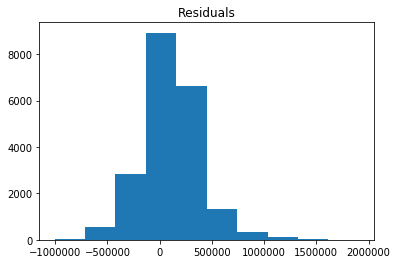

NameError: name 'x' is not defined

In [201]:
plot_residuals(resids)

In [202]:
finaldf = dfnew[x_cols]

In [206]:
finaldf['price']=dfnew['price']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
finaldf.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,floor_1.5,floor_2.0,floor_3.0,view_1.0,view_2.0,view_3.0,view_4.0,grade_4,grade_12,water_True,base_True,distance_from_airport,price
0,-1.725633,-0.263045,-0.327227,0,0,0,0,0,0,0,0,0,1,0,-1.391529,221900.0
1,0.381165,-0.263045,-0.282862,0,1,0,0,0,0,0,0,0,0,1,0.992174,538000.0
2,-1.725633,-1.715623,0.110589,0,0,0,0,0,0,0,0,0,0,0,1.229509,180000.0
3,1.128563,0.767575,-0.545192,0,0,0,0,0,0,0,0,0,0,1,-1.101136,604000.0
4,0.075164,-0.263045,0.547339,0,0,0,0,0,0,0,0,0,0,0,0.609922,510000.0


In [210]:
X = finaldf.drop(columns='price',axis=1)
y = finaldf['price']

In [211]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [213]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [214]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [215]:
ols.coef_

array([-53332.5132314 ,  36172.48361048, -47234.35240599, 310484.13266737,
       501916.52704855, 434467.40154718, 278928.51987673, 254338.34851773,
       366880.15857828, 566205.4573405 , 174126.64140848, 884070.05869901,
       117738.89663688, 356520.35516341,  62293.37376362])

In [216]:
y_train_preds = ols.predict(X_train)
y_train_preds


array([443858.76562084, 493749.3453514 , 109642.63657952, ...,
        93883.35178784, 478668.88883879,  69928.77523556])

In [217]:
r2_score(y_train, y_train_preds)

-0.13966763739390875

In [218]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [219]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

-0.13966763739390875

In [220]:
testing_score = ols.score(X_test, y_test)
testing_score

-0.13586864337811644

In [221]:
# cv = 5 means 80/20 splits
# cv = 10 means 90/10 splits
# cv = 3 means 67/33 splits

cv_scores = cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) 
# cv breaks your data into that many equal pieces 
cv_scores

array([-0.15329018, -0.16789171, -0.14617542, -0.07656858, -0.21379668])

In [230]:
rfe = RFE(ols, n_features_to_select=15, step=1, verbose=2)

In [231]:
X_all = finaldf.drop(columns=['price'])
rfe.fit(X_all, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=2)

In [232]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [233]:
new_cols = X_all.columns[rfe.support_]

In [234]:
new_cols

Index(['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5',
       'floor_2.0', 'floor_3.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'grade_4', 'grade_12', 'water_True', 'base_True',
       'distance_from_airport'],
      dtype='object')